In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import random

### <font color = #8b0000>Data processing :</font>
Open data and process it to train and test set and map with job and label.

In [2]:
data = pd.read_json('../datasets/paul_cloudforecasting_data/processed_data.json')

In [3]:
data.shape

(17442, 3)

In [4]:
data.columns

Index(['date', 'label', 'timestamp'], dtype='object')

In [5]:
data.head()

,date,label,timestamp
0,2019-03-15 15:48:39,"[{'name': 'cloud-bitbake', 'totalExecutor': 2,...",2019-03-15 15:48:39
1,2019-03-15 15:49:11,"[{'name': 'cloud-bitbake', 'totalExecutor': 2,...",2019-03-15 15:49:11
2,2019-03-15 15:51:11,"[{'name': 'cloud-bitbake', 'totalExecutor': 2,...",2019-03-15 15:51:11
3,2019-03-15 15:53:08,"[{'name': 'cloud-bitbake', 'totalExecutor': 2,...",2019-03-15 15:53:08
4,2019-03-15 15:55:19,"[{'name': 'cloud-bitbake', 'totalExecutor': 2,...",2019-03-15 15:55:19


In [6]:
def used_exec(log):
    return sum([(each['missingExecutor'] + each['busyExecutor']) for each in log])
def total_exec(log):
    return sum([each['totalExecutor'] for each in log])
def get_jobs(log):
    return ([each['runningjob'] for each in log])
def get_label(log):
    return ([each['name'] for each in log])

In [7]:
data['required'] = data['label'].apply(used_exec)
data['total'] = data['label'].apply(total_exec)
data['jobs'] = data['label'].apply(get_jobs)
data['labels'] = data['label'].apply(get_label)

In [8]:
data.head()

,date,label,timestamp,required,total,jobs,labels
0,2019-03-15 15:48:39,"[{'name': 'cloud-bitbake', 'totalExecutor': 2,...",2019-03-15 15:48:39,25,307,"[[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeq...","[cloud-bitbake, cloud_bitbake, gitlabci, cloud..."
1,2019-03-15 15:49:11,"[{'name': 'cloud-bitbake', 'totalExecutor': 2,...",2019-03-15 15:49:11,24,307,"[[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeq...","[cloud-bitbake, cloud_bitbake, gitlabci, cloud..."
2,2019-03-15 15:51:11,"[{'name': 'cloud-bitbake', 'totalExecutor': 2,...",2019-03-15 15:51:11,22,307,"[[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeq...","[cloud-bitbake, cloud_bitbake, gitlabci, cloud..."
3,2019-03-15 15:53:08,"[{'name': 'cloud-bitbake', 'totalExecutor': 2,...",2019-03-15 15:53:08,24,307,"[[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeq...","[cloud-bitbake, cloud_bitbake, gitlabci, cloud..."
4,2019-03-15 15:55:19,"[{'name': 'cloud-bitbake', 'totalExecutor': 2,...",2019-03-15 15:55:19,29,307,"[[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeq...","[cloud-bitbake, cloud_bitbake, gitlabci, cloud..."


Mapping between job and label to get the number of required job for each label

In [9]:
def map_job_labels(row):
    jl_map = {}
    for jobs, label in zip(row['jobs'], row['labels']):
        jl_map[label] = jobs
        jl_map['{}_required'.format(label)] = len(jobs)
    return jl_map

In [10]:
data['jl_map'] = data.apply(map_job_labels, axis=1)

In [11]:
data.head()

,date,label,timestamp,required,total,jobs,labels,jl_map
0,2019-03-15 15:48:39,"[{'name': 'cloud-bitbake', 'totalExecutor': 2,...",2019-03-15 15:48:39,25,307,"[[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeq...","[cloud-bitbake, cloud_bitbake, gitlabci, cloud...","{'cloud-bitbake': ['mMIMO » l1low-mw-aeqn ', '..."
1,2019-03-15 15:49:11,"[{'name': 'cloud-bitbake', 'totalExecutor': 2,...",2019-03-15 15:49:11,24,307,"[[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeq...","[cloud-bitbake, cloud_bitbake, gitlabci, cloud...","{'cloud-bitbake': ['mMIMO » l1low-mw-aeqn ', '..."
2,2019-03-15 15:51:11,"[{'name': 'cloud-bitbake', 'totalExecutor': 2,...",2019-03-15 15:51:11,22,307,"[[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeq...","[cloud-bitbake, cloud_bitbake, gitlabci, cloud...","{'cloud-bitbake': ['mMIMO » l1low-mw-aeqn ', '..."
3,2019-03-15 15:53:08,"[{'name': 'cloud-bitbake', 'totalExecutor': 2,...",2019-03-15 15:53:08,24,307,"[[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeq...","[cloud-bitbake, cloud_bitbake, gitlabci, cloud...","{'cloud-bitbake': ['mMIMO » l1low-mw-aeqn ', '..."
4,2019-03-15 15:55:19,"[{'name': 'cloud-bitbake', 'totalExecutor': 2,...",2019-03-15 15:55:19,29,307,"[[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeq...","[cloud-bitbake, cloud_bitbake, gitlabci, cloud...","{'cloud-bitbake': ['mMIMO » l1low-mw-aeqn ', '..."


In [12]:
data_map = data['jl_map'].apply(pd.Series)

In [13]:
data_map.head()

,cloud-bitbake,cloud-bitbake_required,cloud_bitbake,cloud_bitbake_required,gitlabci,gitlabci_required,cloud_hugevm,cloud_hugevm_required,cloud,cloud_required,...,cloud-cache,cloud-cache_required,mrlnxc1,mrlnxc1_required,mrlnxc2,mrlnxc2_required,mrlnxc21,mrlnxc21_required,oulnxc65,oulnxc65_required
0,"[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeqf ]",2.0,"[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeqf ]",2.0,[],0.0,"[HF-releases » ABIL » R50-5G-make-release , mM...",6.0,"[bream » middleware-image-dev-WR , HF-releases...",2,...,[],0.0,[Leka_project » cleanup_leka_rxtx ],1.0,[Leka_project » Leka_rx_gNodeB ],1,[],0.0,[],0
1,"[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeqf ]",2.0,"[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeqf ]",2.0,[],0.0,"[HF-releases » ABIL » R50-5G-make-release , mM...",6.0,"[bream » middleware-image-dev-WR , HF-releases...",2,...,[],0.0,[],0.0,[Leka_project » Leka_rx_gNodeB ],1,[],0.0,[],0
2,"[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeqf ]",2.0,"[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeqf ]",2.0,[],0.0,"[HF-releases » ABIL » R50-5G-make-release , mM...",6.0,"[bream » middleware-image-dev-WR , HF-releases...",2,...,[],0.0,[],0.0,[Leka_project » Leka_rx_gNodeB ],1,[],0.0,[],0
3,"[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeqf ]",2.0,"[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeqf ]",2.0,[],0.0,"[HF-releases » ABIL » R50-5G-make-release , mM...",7.0,"[bream » middleware-image-dev-WR , HF-releases...",2,...,[],0.0,[],0.0,[Leka_project » Leka_rx_gNodeB ],1,[],0.0,[],0
4,"[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeqf ]",2.0,"[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeqf ]",2.0,[],0.0,"[HF-releases » ABIL » R51-5G-build , HF-releas...",12.0,"[bream » middleware-image-dev-WR , HF-releases...",2,...,[],0.0,[],0.0,[Leka_project » Leka_rx_gNodeB ],1,[],0.0,[],0


In [14]:
processed_data = pd.concat([data, data_map], axis = 1)

In [15]:
processed_data.head()

,date,label,timestamp,required,total,jobs,labels,jl_map,cloud-bitbake,cloud-bitbake_required,...,cloud-cache,cloud-cache_required,mrlnxc1,mrlnxc1_required,mrlnxc2,mrlnxc2_required,mrlnxc21,mrlnxc21_required,oulnxc65,oulnxc65_required
0,2019-03-15 15:48:39,"[{'name': 'cloud-bitbake', 'totalExecutor': 2,...",2019-03-15 15:48:39,25,307,"[[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeq...","[cloud-bitbake, cloud_bitbake, gitlabci, cloud...","{'cloud-bitbake': ['mMIMO » l1low-mw-aeqn ', '...","[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeqf ]",2.0,...,[],0.0,[Leka_project » cleanup_leka_rxtx ],1.0,[Leka_project » Leka_rx_gNodeB ],1,[],0.0,[],0
1,2019-03-15 15:49:11,"[{'name': 'cloud-bitbake', 'totalExecutor': 2,...",2019-03-15 15:49:11,24,307,"[[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeq...","[cloud-bitbake, cloud_bitbake, gitlabci, cloud...","{'cloud-bitbake': ['mMIMO » l1low-mw-aeqn ', '...","[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeqf ]",2.0,...,[],0.0,[],0.0,[Leka_project » Leka_rx_gNodeB ],1,[],0.0,[],0
2,2019-03-15 15:51:11,"[{'name': 'cloud-bitbake', 'totalExecutor': 2,...",2019-03-15 15:51:11,22,307,"[[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeq...","[cloud-bitbake, cloud_bitbake, gitlabci, cloud...","{'cloud-bitbake': ['mMIMO » l1low-mw-aeqn ', '...","[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeqf ]",2.0,...,[],0.0,[],0.0,[Leka_project » Leka_rx_gNodeB ],1,[],0.0,[],0
3,2019-03-15 15:53:08,"[{'name': 'cloud-bitbake', 'totalExecutor': 2,...",2019-03-15 15:53:08,24,307,"[[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeq...","[cloud-bitbake, cloud_bitbake, gitlabci, cloud...","{'cloud-bitbake': ['mMIMO » l1low-mw-aeqn ', '...","[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeqf ]",2.0,...,[],0.0,[],0.0,[Leka_project » Leka_rx_gNodeB ],1,[],0.0,[],0
4,2019-03-15 15:55:19,"[{'name': 'cloud-bitbake', 'totalExecutor': 2,...",2019-03-15 15:55:19,29,307,"[[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeq...","[cloud-bitbake, cloud_bitbake, gitlabci, cloud...","{'cloud-bitbake': ['mMIMO » l1low-mw-aeqn ', '...","[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeqf ]",2.0,...,[],0.0,[],0.0,[Leka_project » Leka_rx_gNodeB ],1,[],0.0,[],0


In [16]:
processed_data.drop(['jl_map'], axis=1, inplace=True )

In [17]:
processed_data.head()

,date,label,timestamp,required,total,jobs,labels,cloud-bitbake,cloud-bitbake_required,cloud_bitbake,...,cloud-cache,cloud-cache_required,mrlnxc1,mrlnxc1_required,mrlnxc2,mrlnxc2_required,mrlnxc21,mrlnxc21_required,oulnxc65,oulnxc65_required
0,2019-03-15 15:48:39,"[{'name': 'cloud-bitbake', 'totalExecutor': 2,...",2019-03-15 15:48:39,25,307,"[[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeq...","[cloud-bitbake, cloud_bitbake, gitlabci, cloud...","[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeqf ]",2.0,"[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeqf ]",...,[],0.0,[Leka_project » cleanup_leka_rxtx ],1.0,[Leka_project » Leka_rx_gNodeB ],1,[],0.0,[],0
1,2019-03-15 15:49:11,"[{'name': 'cloud-bitbake', 'totalExecutor': 2,...",2019-03-15 15:49:11,24,307,"[[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeq...","[cloud-bitbake, cloud_bitbake, gitlabci, cloud...","[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeqf ]",2.0,"[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeqf ]",...,[],0.0,[],0.0,[Leka_project » Leka_rx_gNodeB ],1,[],0.0,[],0
2,2019-03-15 15:51:11,"[{'name': 'cloud-bitbake', 'totalExecutor': 2,...",2019-03-15 15:51:11,22,307,"[[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeq...","[cloud-bitbake, cloud_bitbake, gitlabci, cloud...","[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeqf ]",2.0,"[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeqf ]",...,[],0.0,[],0.0,[Leka_project » Leka_rx_gNodeB ],1,[],0.0,[],0
3,2019-03-15 15:53:08,"[{'name': 'cloud-bitbake', 'totalExecutor': 2,...",2019-03-15 15:53:08,24,307,"[[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeq...","[cloud-bitbake, cloud_bitbake, gitlabci, cloud...","[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeqf ]",2.0,"[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeqf ]",...,[],0.0,[],0.0,[Leka_project » Leka_rx_gNodeB ],1,[],0.0,[],0
4,2019-03-15 15:55:19,"[{'name': 'cloud-bitbake', 'totalExecutor': 2,...",2019-03-15 15:55:19,29,307,"[[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeq...","[cloud-bitbake, cloud_bitbake, gitlabci, cloud...","[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeqf ]",2.0,"[mMIMO » l1low-mw-aeqn , mMIMO » l1low-mw-aeqf ]",...,[],0.0,[],0.0,[Leka_project » Leka_rx_gNodeB ],1,[],0.0,[],0


Replace NaN values by 0

In [18]:
processed_data['scheduler_required'].hasnans #Detect if scheduler_required has NaN values

True

In [19]:
processed_data['scheduler_required'][8434:].isnull().sum().sum()

13

In [20]:
processed_data.iloc[8434]

date                                                    2019-03-27 17:59:08
label                     [{'name': 'cloud-bitbake', 'totalExecutor': 1,...
timestamp                                               2019-03-27 17:59:08
required                                                                  1
total                                                                    79
jobs                      [[], [], [], [], [Leka_project » leka_tx_UVM ]...
labels                    [cloud-bitbake, cloud_bitbake, cloud, cloud-ca...
cloud-bitbake                                                            []
cloud-bitbake_required                                                    0
cloud_bitbake                                                            []
cloud_bitbake_required                                                    0
gitlabci                                                                NaN
gitlabci_required                                                       NaN
cloud_hugevm

In [21]:
processed_data.fillna(0, inplace = True) #Replace NaN with 0

In [22]:
processed_data['scheduler_required'].hasnans 

False

In [23]:
#Dataset parameters
window_size = 30#One hour window
in_advance = 20#How many timesteps in advance do we want to predict? 1: predict state at next timestep, 10: predict state in next 20 minutes etc.

In [24]:
#Create the windowed data to use for training
scheduler_required_last_x_window = []
for i in range(window_size):
    scheduler_required_last_x_window.append(np.array(window_size*[0]))
for index, elem in processed_data.iterrows():
    if index > window_size:#For all samples
        scheduler_required_last_x_window.append(processed_data['scheduler_required'][index-window_size:index].values)                                    

In [25]:
hour_data = []
for index, elem in processed_data.iterrows():
    hour_data.append(elem['date'])

Train-test split:

In [26]:
from sklearn.model_selection import train_test_split
#These are for Holt-Winters method
train = processed_data[:15120] #One week = 5040 records
test = processed_data[15230:]

X_windowed_train, X_windowed_test, Y_windowed_train, Y_windowed_test = train_test_split(scheduler_required_last_x_window[window_size:-in_advance], processed_data['scheduler_required'][window_size+in_advance+1:].values, train_size=0.7, shuffle=False)
X_windowed_train = np.array(X_windowed_train)
X_windowed_test = np.array(X_windowed_test)

X_total_train, X_total_test = train_test_split(processed_data['total'][window_size+1:-in_advance], train_size=0.7, shuffle=False)

/home/jeniemin/Documents/Deep Learning project/venv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [27]:
"""
#For verification
print(X_windowed_train)
print(Y_windowed_train)
print(X_total_train.shape)
print(X_total_test.shape)
print(X_windowed_train.shape)
print(X_windowed_test.shape)
"""

'\n#For verification\nprint(X_windowed_train)\nprint(Y_windowed_train)\nprint(X_total_train.shape)\nprint(X_total_test.shape)\nprint(X_windowed_train.shape)\nprint(X_windowed_test.shape)\n'

At this point, we have a training set with 15k datas and a dev/test set with 2k datas, let's try out differents methodes of forecasting.

 ### <font color = #8b0000>Plot data :</font>
 Let's start by just plot the different result we have

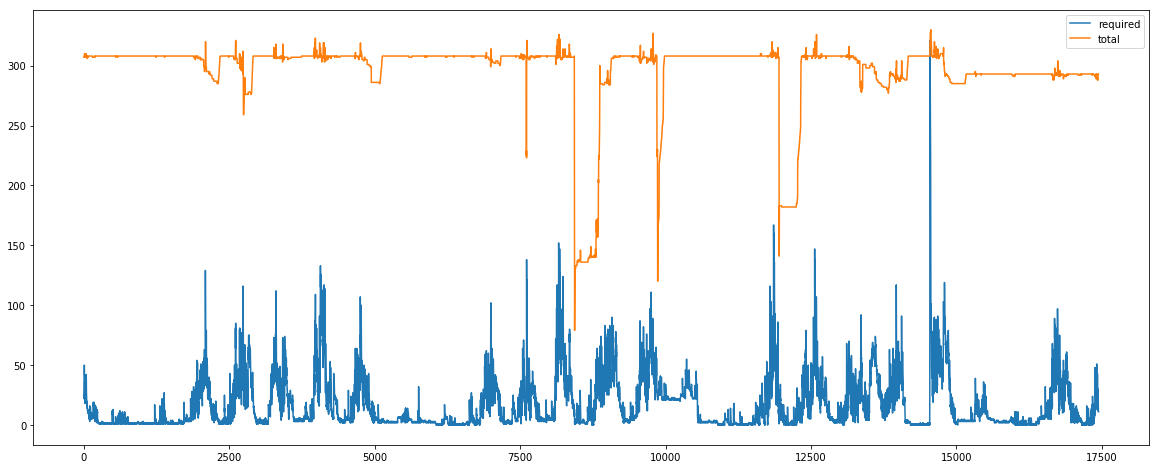

In [28]:
pp.figure(figsize=(20,8))
pp.plot(data['required'])
pp.plot(data['total'])
pp.legend()

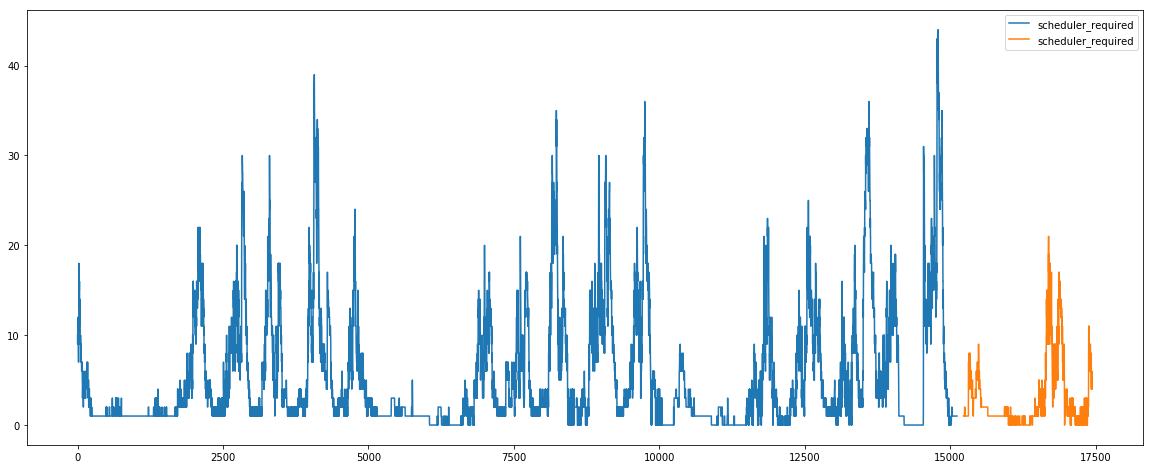

In [29]:
#For "scheduler_required"
pp.figure(figsize=(20,8))
pp.plot(train['scheduler_required'])
pp.plot(test['scheduler_required'])
pp.legend()

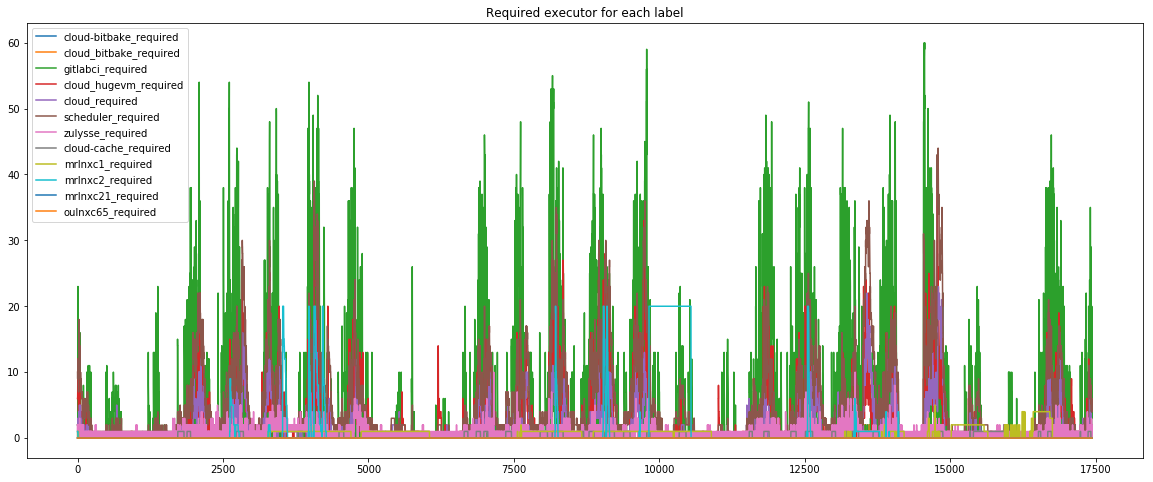

In [30]:
pp.figure(figsize=(20,8))
for each_col in processed_data.columns:
    if '_required' in each_col:
        pp.plot(processed_data[each_col])
pp.title('Required executor for each label')
pp.legend()

Text(0, 0.5, 'required executor')

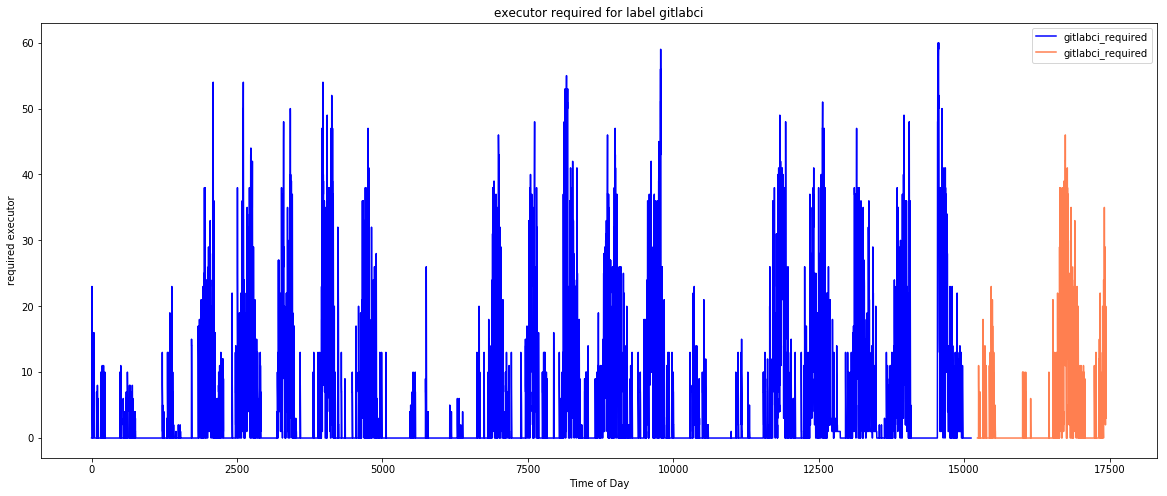

In [31]:
pp.figure(figsize=(20,8))
pp.plot(train['gitlabci_required'], color="blue")
pp.plot(test['gitlabci_required'], color="coral")
pp.title('executor required for label gitlabci')
pp.legend()
pp.xlabel('Time of Day')
pp.ylabel('required executor')

Text(0, 0.5, 'required executor')

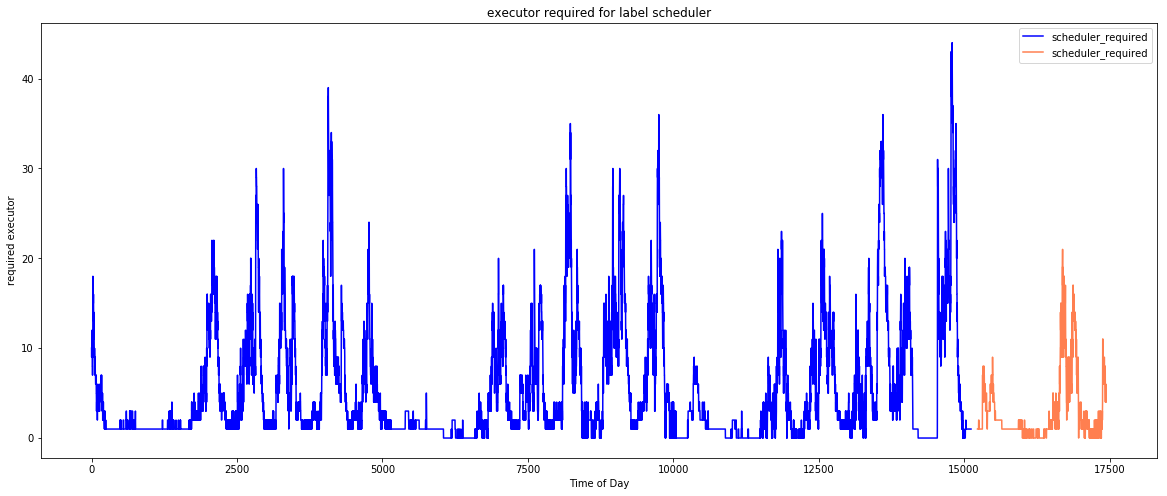

In [32]:
pp.figure(figsize=(20,8))
pp.plot(train['scheduler_required'], color="blue")
pp.plot(test['scheduler_required'], color="coral")
pp.title('executor required for label scheduler')
pp.legend()
pp.xlabel('Time of Day')
pp.ylabel('required executor')

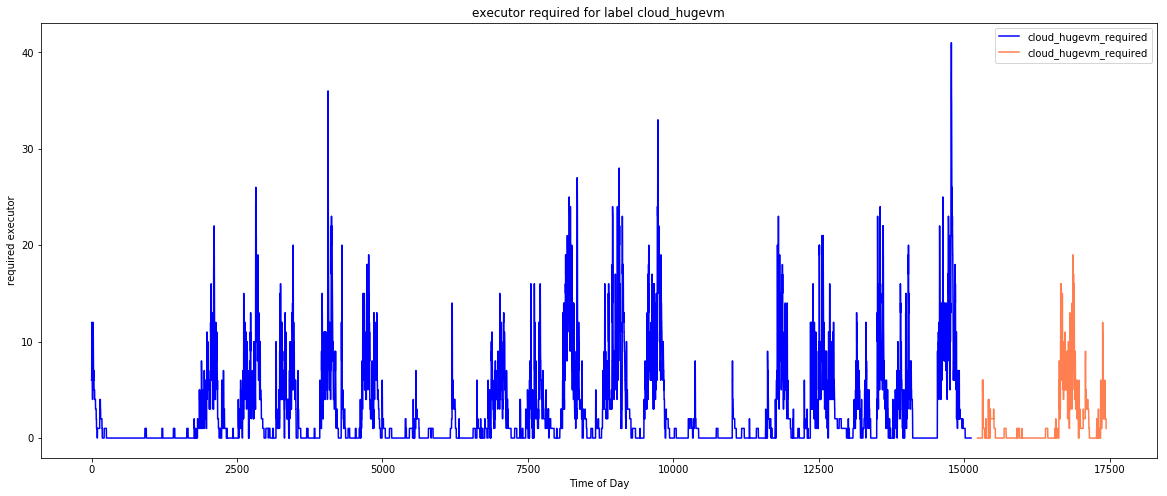

In [33]:
pp.figure(figsize=(20,8))
pp.plot(train['cloud_hugevm_required'], color="blue")
pp.plot(test['cloud_hugevm_required'], color="coral")
pp.title('executor required for label cloud_hugevm')
pp.legend()
pp.xlabel('Time of Day')
pp.ylabel('required executor')
pp.show()

### <font color = #8b0000>Forecasting part :</font>
__With the Holt winters method__


In [34]:
"""
#import packages
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.statespace import sarimax as sm
"""

'\n#import packages\nfrom sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error\nfrom sklearn.metrics import mean_squared_error, mean_squared_log_error\nfrom statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt\nfrom statsmodels.tsa.statespace import sarimax as sm\n'

With statsmodels package

In [35]:
"""
#test
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['scheduler_required']) ,seasonal_periods=3 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
pp.figure(figsize=(16,8))
pp.plot( train['scheduler_required'], label='Train')
pp.plot(test['scheduler_required'], label='Test')
pp.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
pp.legend(loc='best')
pp.show()
"""

"\n#test\ny_hat_avg = test.copy()\nfit1 = ExponentialSmoothing(np.asarray(train['scheduler_required']) ,seasonal_periods=3 ,trend='add', seasonal='add',).fit()\ny_hat_avg['Holt_Winter'] = fit1.forecast(len(test))\npp.figure(figsize=(16,8))\npp.plot( train['scheduler_required'], label='Train')\npp.plot(test['scheduler_required'], label='Test')\npp.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')\npp.legend(loc='best')\npp.show()\n"

In [36]:
"""
#test  // Very long to run
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['scheduler_required']) ,seasonal_periods=4950 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
pp.figure(figsize=(16,8))
pp.plot( train['scheduler_required'], label='Train')
pp.plot(test['scheduler_required'], label='Test')
pp.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
pp.legend(loc='best')
pp.show()
"""

"\n#test  // Very long to run\ny_hat_avg = test.copy()\nfit1 = ExponentialSmoothing(np.asarray(train['scheduler_required']) ,seasonal_periods=4950 ,trend='add', seasonal='add',).fit()\ny_hat_avg['Holt_Winter'] = fit1.forecast(len(test))\npp.figure(figsize=(16,8))\npp.plot( train['scheduler_required'], label='Train')\npp.plot(test['scheduler_required'], label='Test')\npp.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')\npp.legend(loc='best')\npp.show()\n"

With personal implementation :

In [37]:
def initial_trend(data, season_length):
    sum = 0.0
    for i in range(season_length):
        sum += float(data[i+season_length])
    return sum / season_length

In [38]:
def initial_seasonal_components(data, season_length):
    seasonals = {}
    season_average=[]
    nb_seasons = int(len(data)/season_length)
    # get season average
    for i in range(nb_seasons):
        season_average.append(sum(data[season_length*i:season_length*i+season_length])/float(season_length))
    #get initial values
    for j in range(season_length):
        sum_vals_over_avg = 0.0
        for k in range(nb_seasons):
            sum_vals_over_avg += data[season_length*k+j]-season_average[k]
        seasonals[j] = sum_vals_over_avg/nb_seasons
    return seasonals

In [39]:
def HoltWinters(data, season_length, alpha, beta, gamma, forecast):
    result = []
    seasonals = initial_seasonal_components(data, season_length)
    for i in range(len(data)+forecast):
        if i == 0: # initial values
            smooth = data[0]
            trend = initial_trend(data, season_length)
            result.append(data[0])
            continue
        if i >= len(data): # we are forecasting
            m = i - len(data) + 1
            result.append((smooth + m*trend) + seasonals[i%season_length])
        else:
            val = data[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%season_length]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%season_length] = gamma*(val-smooth) + (1-gamma)*seasonals[i%season_length]
            result.append(smooth+trend+seasonals[i%season_length])
    return result

In [40]:
def plot_HoltWinters(train, test, season_length, alpha, beta, gamma, forecast):
    pp.figure(figsize=(16,8))
    pp.plot(train, label='Train')
    pp.plot(test, label='Test')
    pp.plot(HoltWinters(train, season_length, alpha, beta, gamma, forecast), label="Alpha {}, Beta {}, Gamma {}".format(alpha,beta, gamma))
    pp.legend(loc='best')
    pp.show()

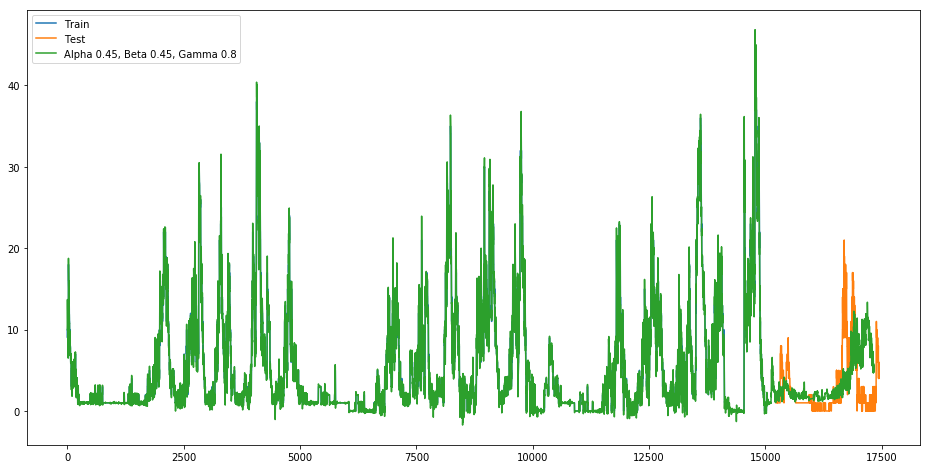

In [41]:
plot_HoltWinters(train['scheduler_required'], test['scheduler_required'], 5040, 0.45,0.45,0.8, test['scheduler_required'].shape[0])

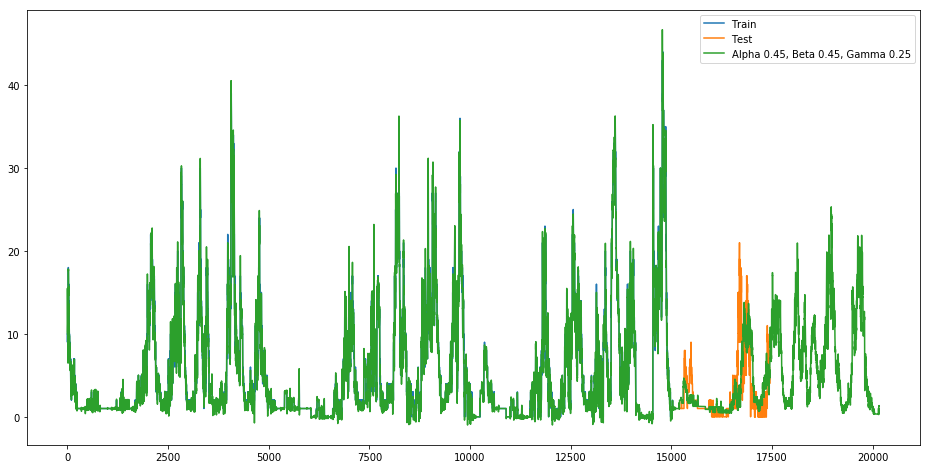

In [42]:
plot_HoltWinters(train['scheduler_required'], test['scheduler_required'], 4950, 0.45,0.45,0.25, 5040)

With a simple LSTM model that uses a single input feature:

In [43]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM, SpatialDropout1D
from keras import Input, Model
from keras.layers import concatenate
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

Using TensorFlow backend.


Model parameters - play around with these to try and get a better model

In [44]:
N_LSTM_NEURONS = 100
MAX_RQ_EXECUTORS = 200#Used for the embedding layer definition
EMBEDDING_DIM = 200
epochs = 80
batch_size = 64
loss_chosen = 'mse'

es = EarlyStopping(monitor='val_loss')#For stopping training when overfitting starts
cb_list = []#Add 'es' here for early stopping

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               52400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 52,501
Trainable params: 52,501
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 9738 samples, validate on 2435 samples
Epoch 1/80
9738/9738 [==============================] - 1s 110us/step - loss: 25.1604 - mean_absolute_error: 2.9139 - acc: 0.2265 - val_loss: 8.6537 - val_mean_absolute_error: 1.8084 - val_acc: 0.4665
Epoch 2/80
9738/9738 [============================

9738/9738 [==============================] - 1s 56us/step - loss: 12.9299 - mean_absolute_error: 2.1191 - acc: 0.3669 - val_loss: 5.8127 - val_mean_absolute_error: 1.4023 - val_acc: 0.4591
Epoch 34/80
9738/9738 [==============================] - 1s 54us/step - loss: 12.8150 - mean_absolute_error: 2.1149 - acc: 0.3593 - val_loss: 6.2592 - val_mean_absolute_error: 1.4460 - val_acc: 0.4669
Epoch 35/80
9738/9738 [==============================] - 1s 52us/step - loss: 13.0354 - mean_absolute_error: 2.1234 - acc: 0.3650 - val_loss: 5.7193 - val_mean_absolute_error: 1.3952 - val_acc: 0.4505
Epoch 36/80
9738/9738 [==============================] - 1s 54us/step - loss: 12.9911 - mean_absolute_error: 2.1226 - acc: 0.3535 - val_loss: 6.4095 - val_mean_absolute_error: 1.4951 - val_acc: 0.4464
Epoch 37/80
9738/9738 [==============================] - 1s 52us/step - loss: 12.7173 - mean_absolute_error: 2.1021 - acc: 0.3614 - val_loss: 5.6692 - val_mean_absolute_error: 1.3953 - val_acc: 0.4489
Epoch 3

Epoch 74/80
9738/9738 [==============================] - 1s 60us/step - loss: 12.4260 - mean_absolute_error: 2.0663 - acc: 0.3715 - val_loss: 6.1667 - val_mean_absolute_error: 1.4923 - val_acc: 0.4357
Epoch 75/80
9738/9738 [==============================] - 1s 59us/step - loss: 12.3334 - mean_absolute_error: 2.0604 - acc: 0.3686 - val_loss: 5.6231 - val_mean_absolute_error: 1.3462 - val_acc: 0.4472
Epoch 76/80
9738/9738 [==============================] - 1s 59us/step - loss: 12.3456 - mean_absolute_error: 2.0607 - acc: 0.3644 - val_loss: 6.1801 - val_mean_absolute_error: 1.5131 - val_acc: 0.4304
Epoch 77/80
9738/9738 [==============================] - 1s 58us/step - loss: 12.4304 - mean_absolute_error: 2.0787 - acc: 0.3606 - val_loss: 6.6089 - val_mean_absolute_error: 1.5332 - val_acc: 0.4341
Epoch 78/80
9738/9738 [==============================] - 1s 58us/step - loss: 12.6795 - mean_absolute_error: 2.0999 - acc: 0.3638 - val_loss: 5.8678 - val_mean_absolute_error: 1.4309 - val_acc: 0.

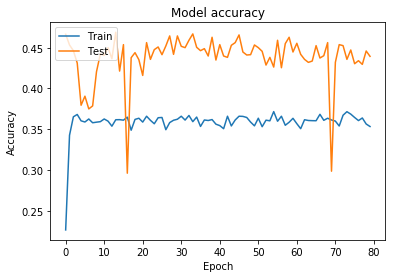

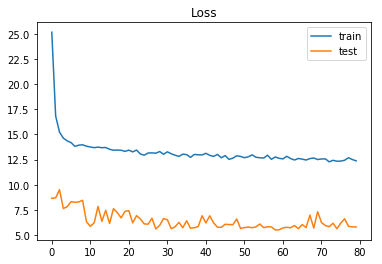

In [45]:
#Have to reshape here if no embedding layer.
X_windowed_train_1 = X_windowed_train.reshape(X_windowed_train.shape[0], 1, window_size)
X_windowed_test_1 = X_windowed_test.reshape((X_windowed_test.shape[0], 1, window_size))
model = Sequential()
model.add(LSTM(N_LSTM_NEURONS, input_shape=(1, window_size), dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1))#For regression
#model.add(Dense(MAX_RQ_EXECUTORS))#For using loss sparse_categorical_crossentropy
model.compile(loss=loss_chosen, optimizer='adam', metrics=['mae', 'accuracy'])#For regression

model.summary()
#plot_model(model, to_file='model.png')
#Fit using training data
history = model.fit(X_windowed_train_1, Y_windowed_train, epochs=epochs, batch_size=batch_size,validation_split=0.2, callbacks=cb_list)

#Test using test data
accr = model.evaluate(X_windowed_test_1,Y_windowed_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

# Plot training & validation accuracy values

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

A more complicated model 2 - multiple input features concatenated. Under construction - may produce errors and/or bad results

In [46]:
#Second model, with multiple features including text and other features. Has to be done using Keras functional API.
windowed_input = Input(shape=(window_size,), name='windowed_input')
total_input = Input(shape=(1,), name='total_input')
#emb = Embedding(output_dim=MAX_RQ_EXECUTORS, input_dim=100, input_length=seq_length)(nlp_input)
#print(windowed_input.shape)
emb = Embedding(MAX_RQ_EXECUTORS, EMBEDDING_DIM)(windowed_input)
#nlp_out = Bidirectional(LSTM(128, dropout=0.3, recurrent_dropout=0.3, kernel_regularizer=regularizers.l2(0.01)))(emb)
lstm_out = LSTM(N_LSTM_NEURONS, dropout=0.2, recurrent_dropout=0.2)(emb)
#emb2 = Embedding(MAX_RQ_EXECUTORS, EMBEDDING_DIM, input_shape=windowed_input.shape)(lstm_out)
x = concatenate([lstm_out, total_input])
#x = Dense(classifier_neurons, activation='relu')(x)
#x = Dense(MAX_RQ_EXECUTORS)(x)#For regression
x = Dense(MAX_RQ_EXECUTORS, activation='softmax')(x)#For classification
model2 = Model(inputs=[windowed_input, total_input], outputs=[x])
#model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'accuracy'])#For regression
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])#For classification


model2.summary()
#plot_model(model, to_file='model2.png')
#Fit using training data
history = model2.fit([X_windowed_train, X_total_train], Y_windowed_train, epochs=epochs, batch_size=batch_size,validation_split=0.1, callbacks=cb_list)
#Test using test data
accr = model.evaluate(X_windowed_test,Y_windowed_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

# Plot training & validation accuracy values
"""
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
"""

#Categorization
# Plot training & validation accuracy values
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
windowed_input (InputLayer)     (None, 30)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 30, 200)      40000       windowed_input[0][0]             
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, 100)          120400      embedding_1[0][0]                
__________________________________________________________________________________________________
total_input (InputLayer)        (None, 1)            0                                            
__________________________________________________________________________________________________
concatenat

KeyboardInterrupt: 

Manual evaluation of LSTM results on test set

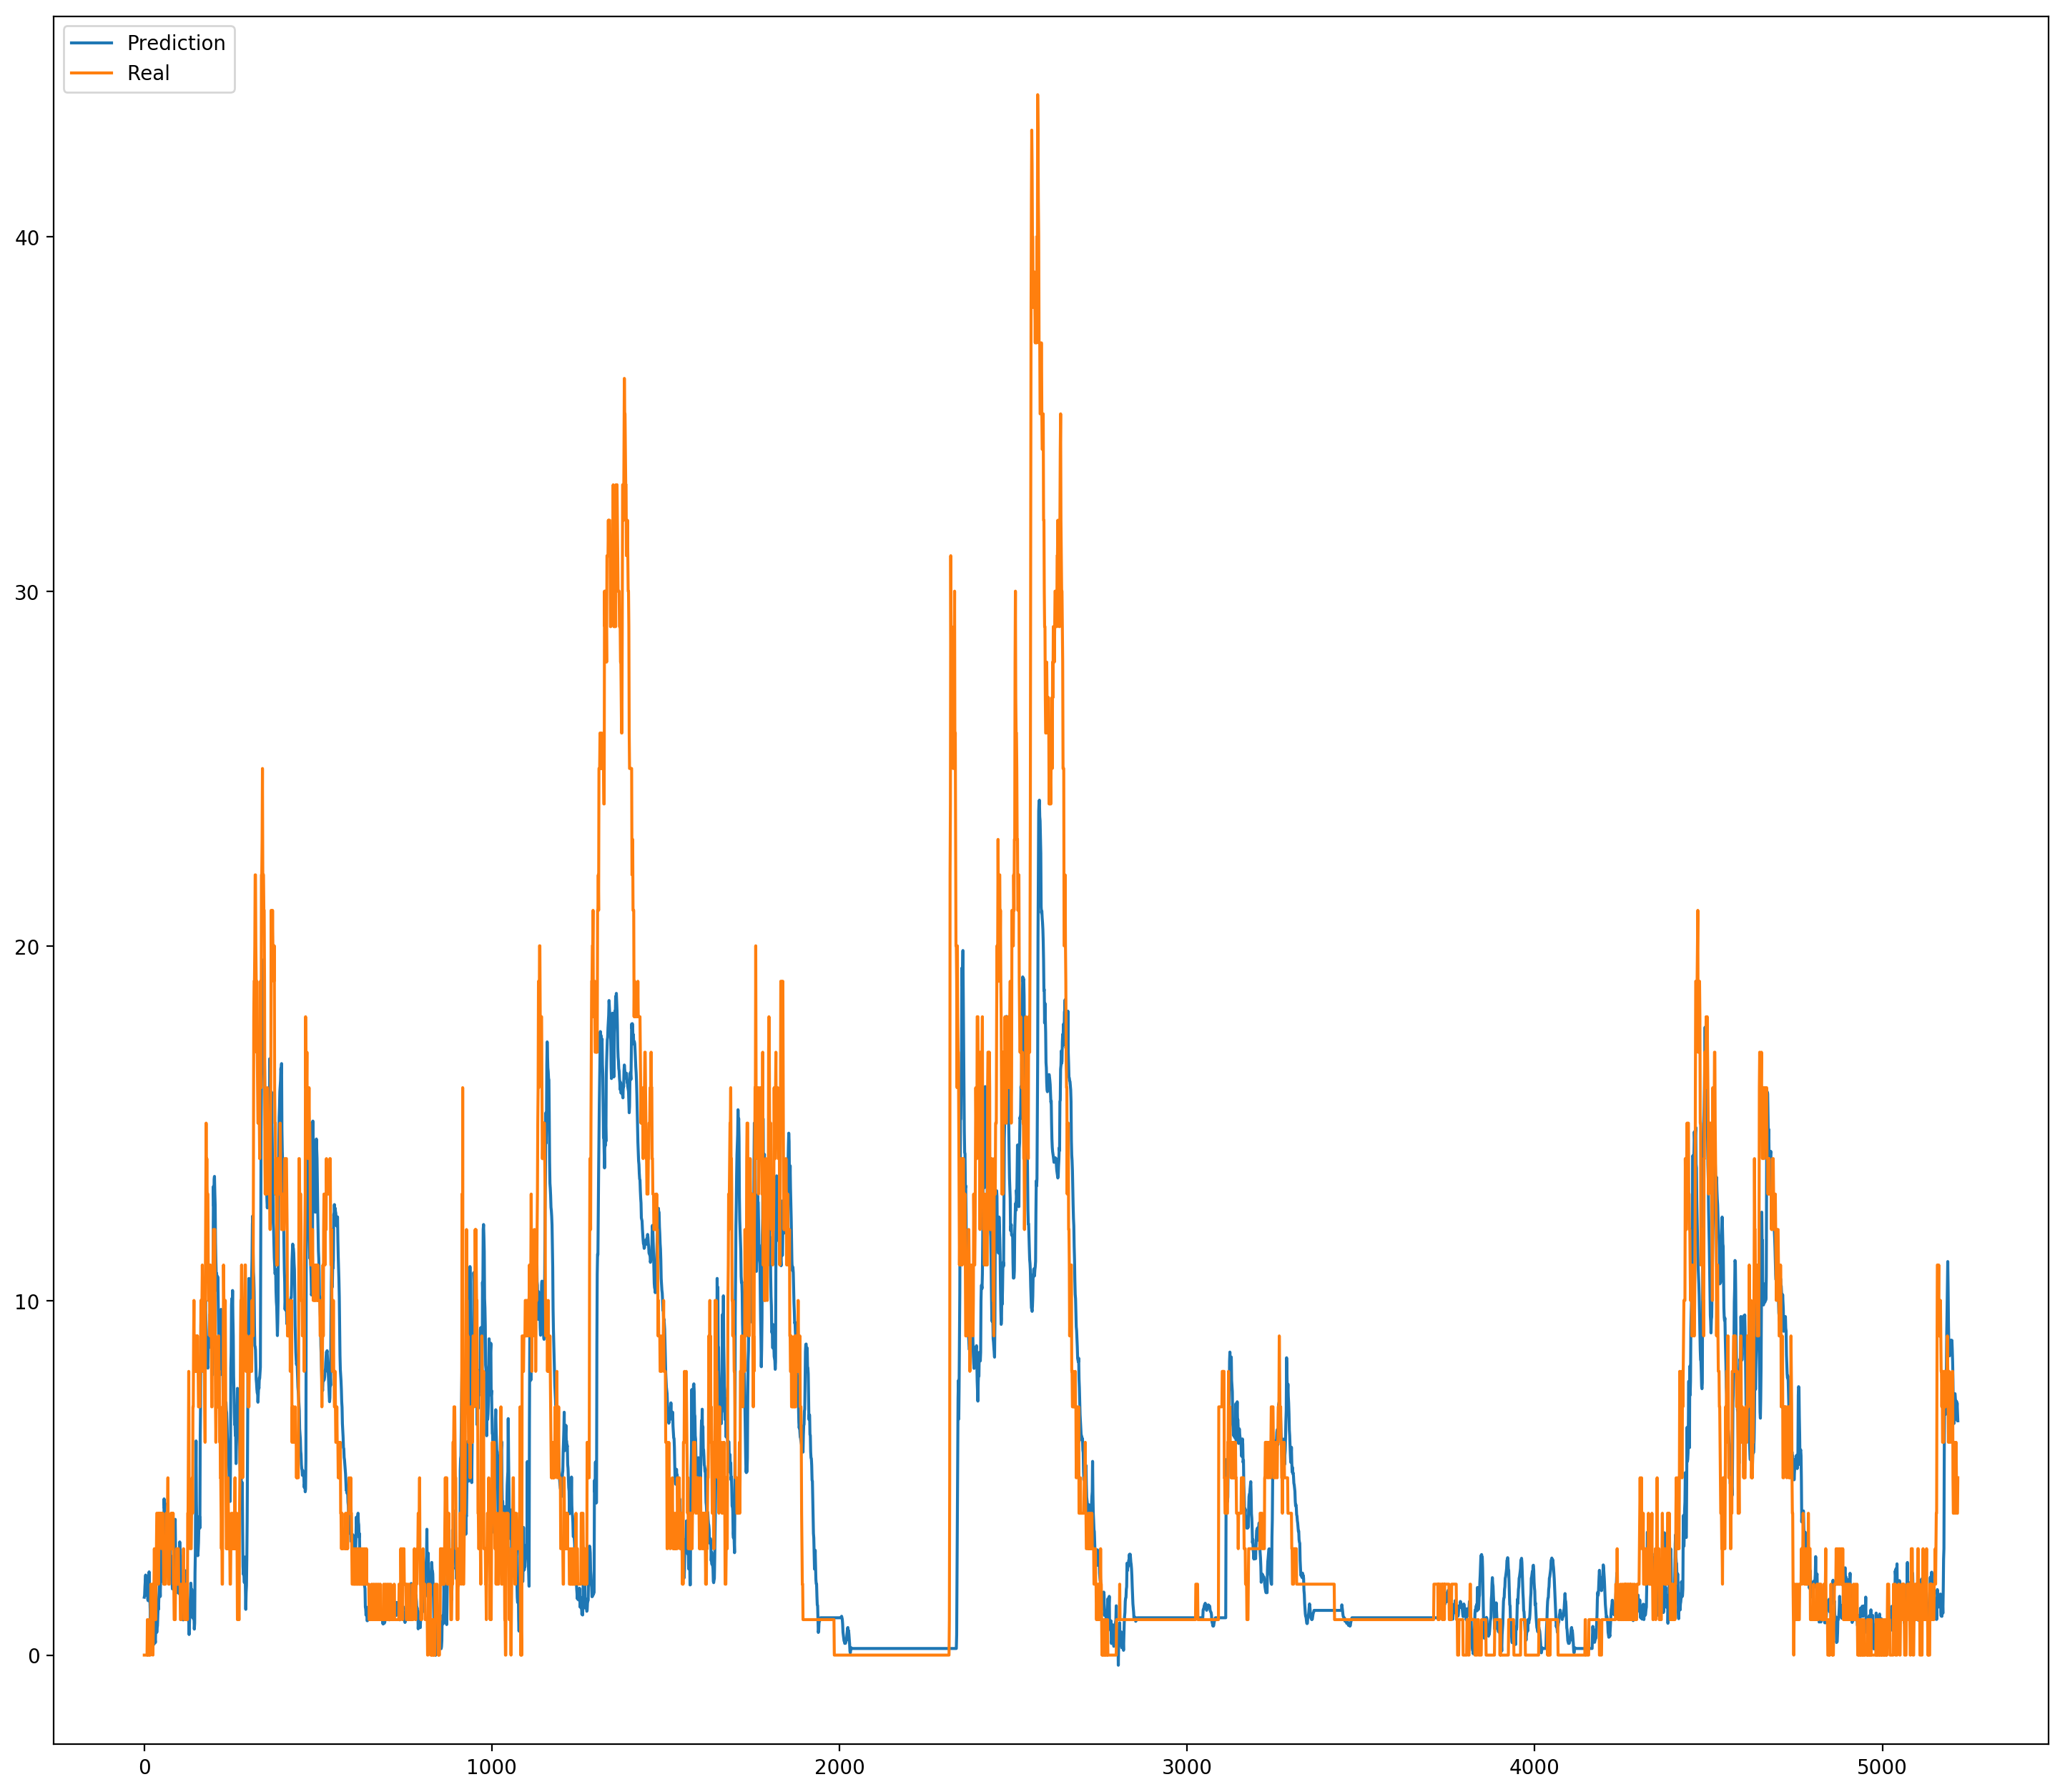

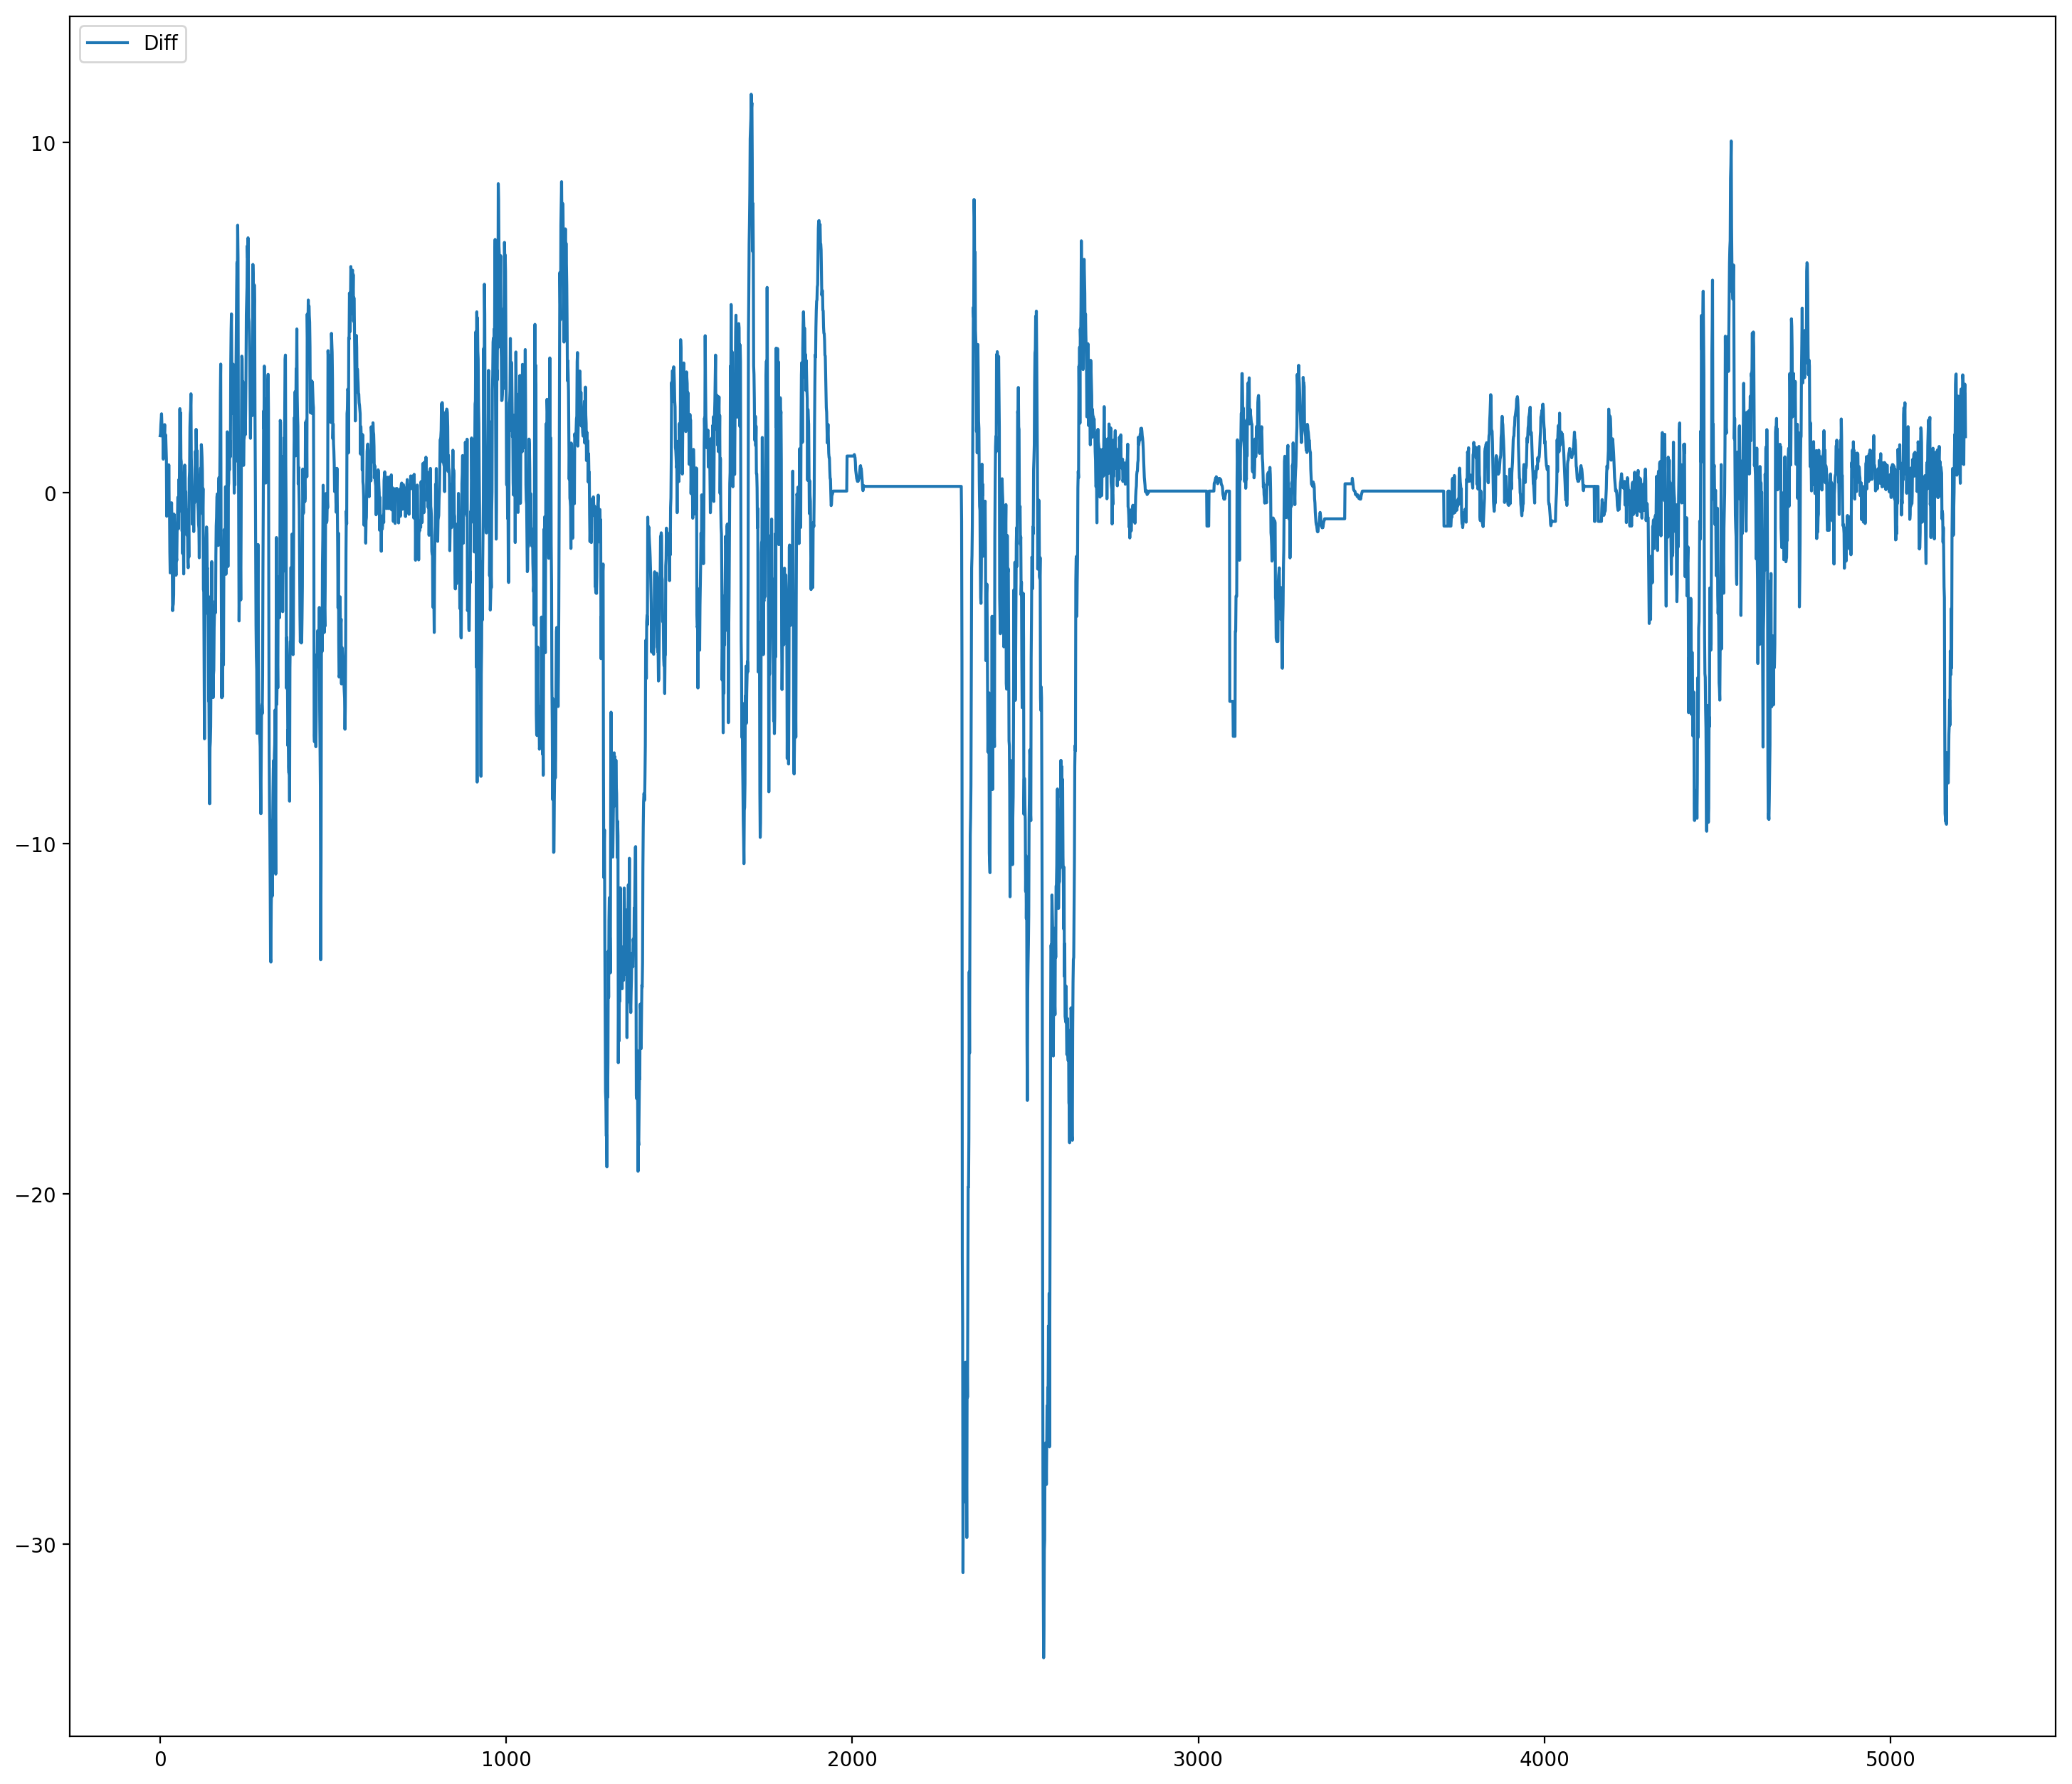

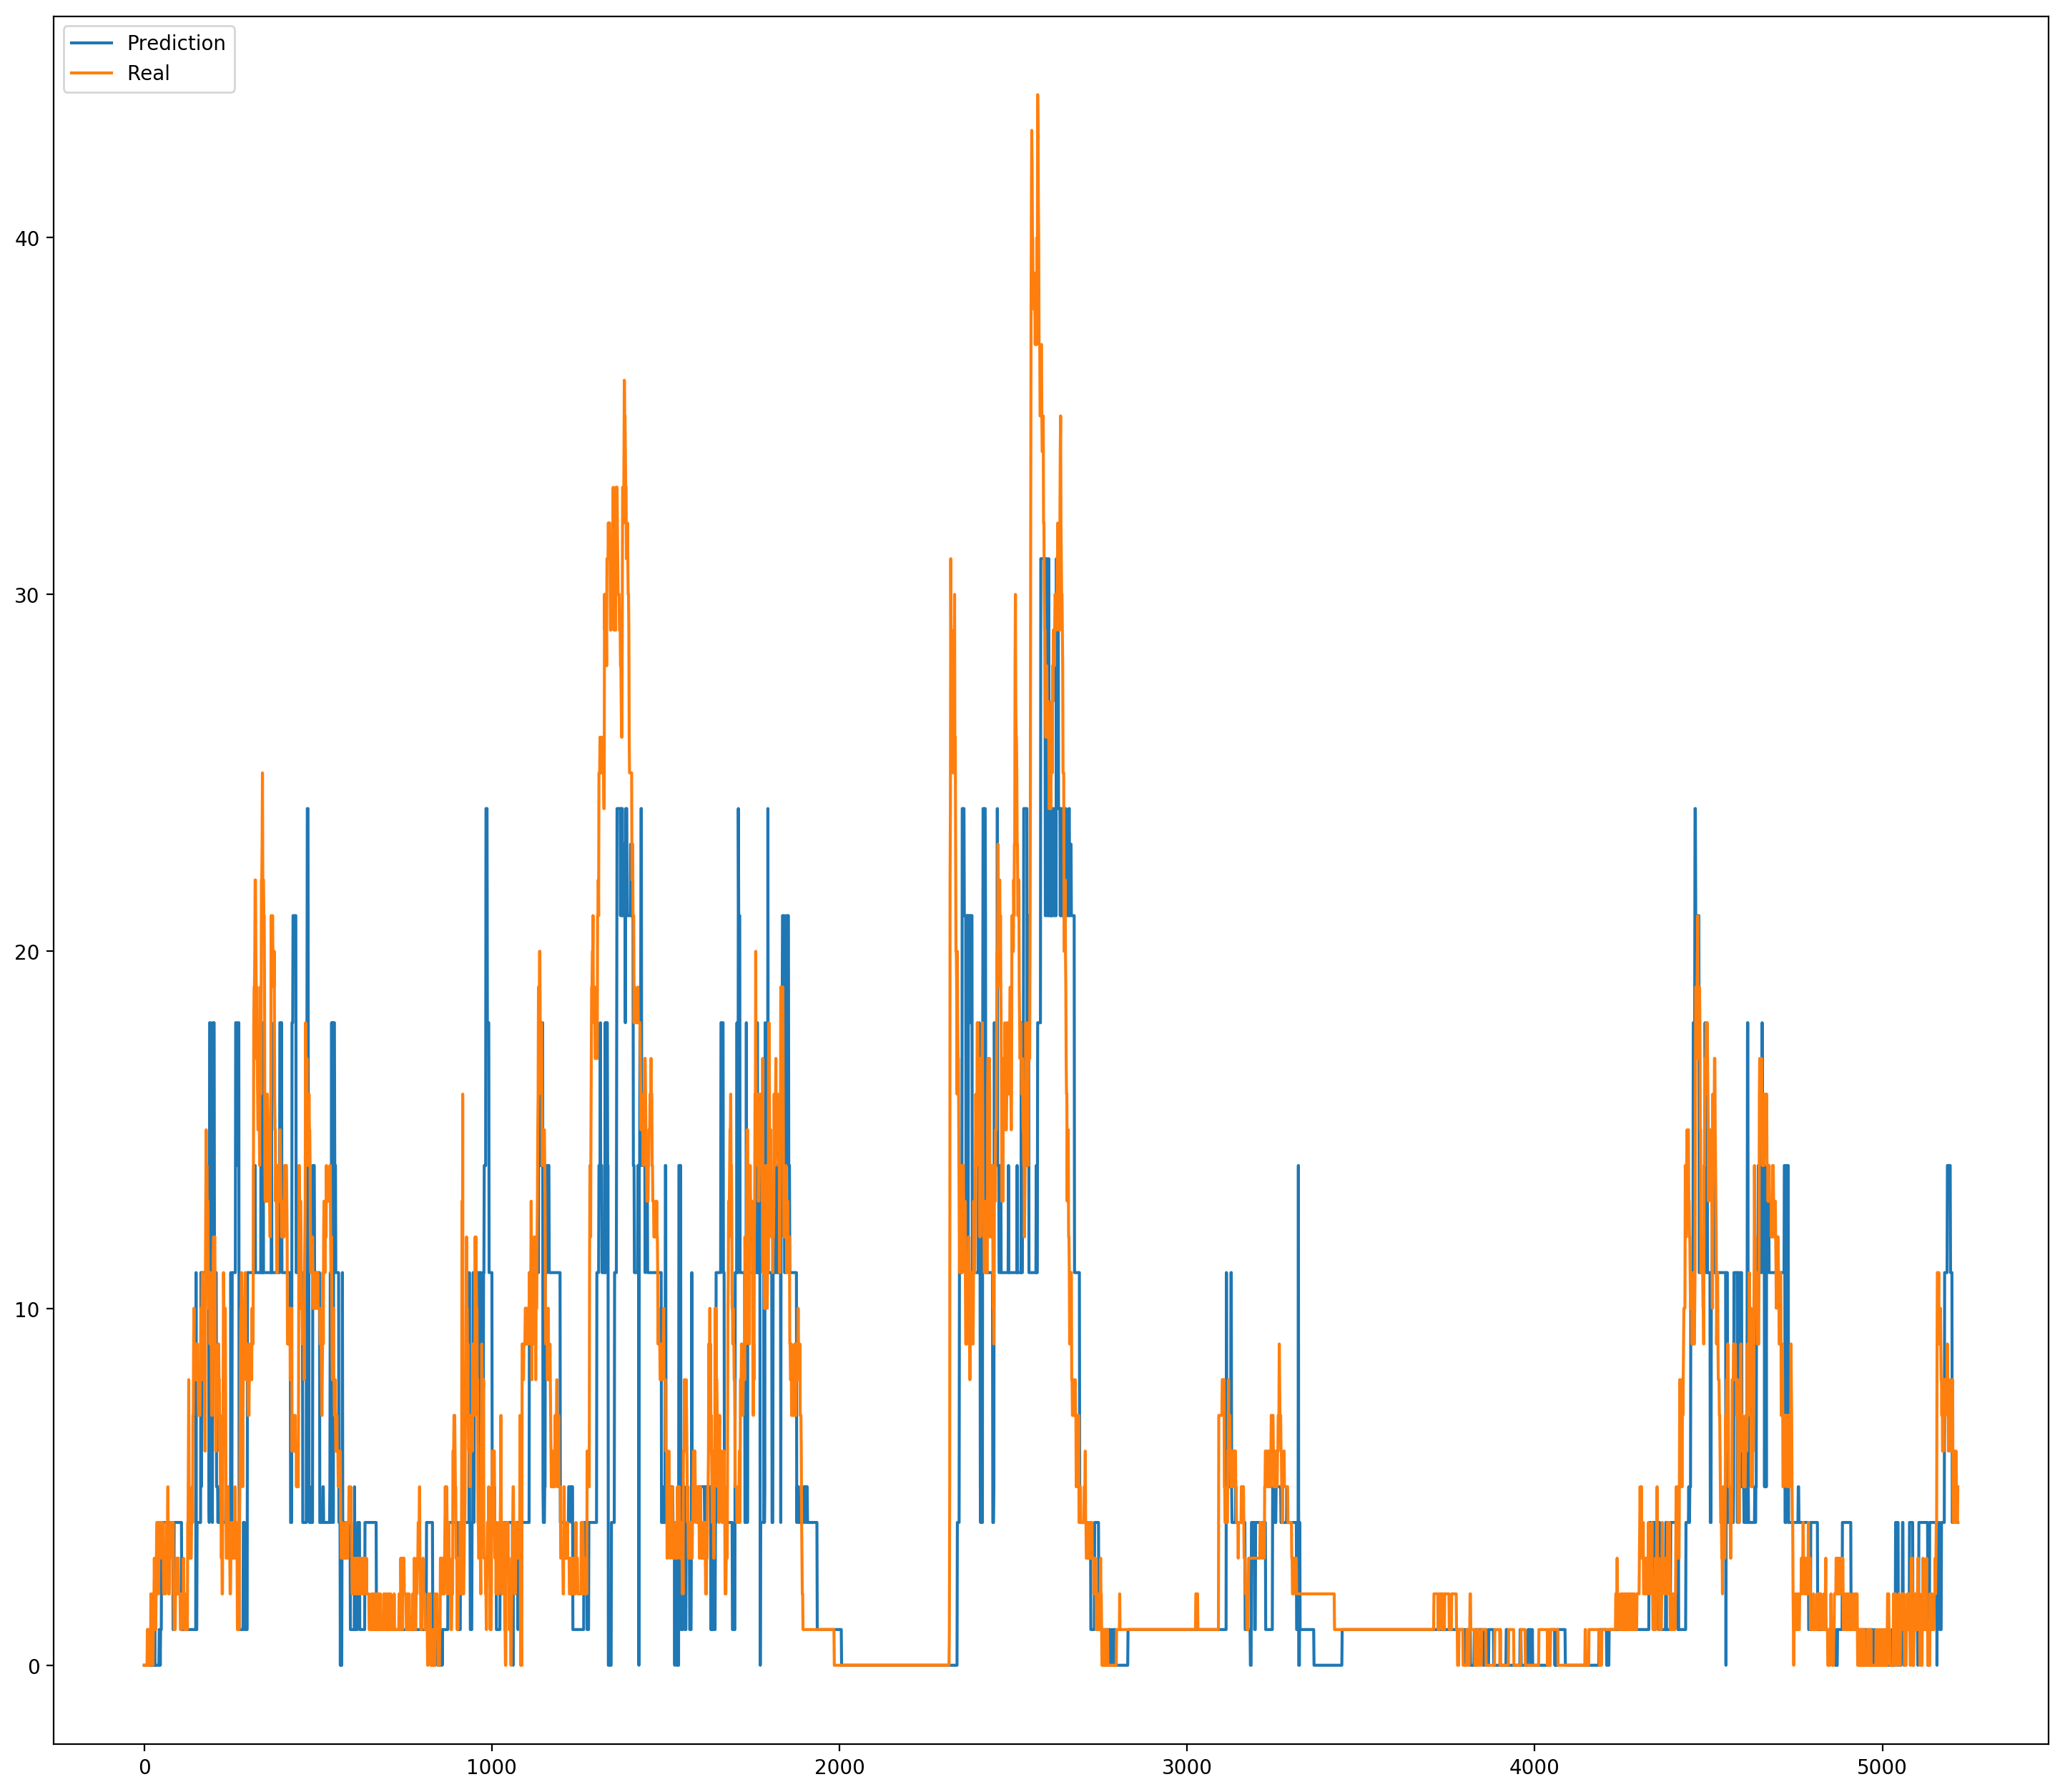

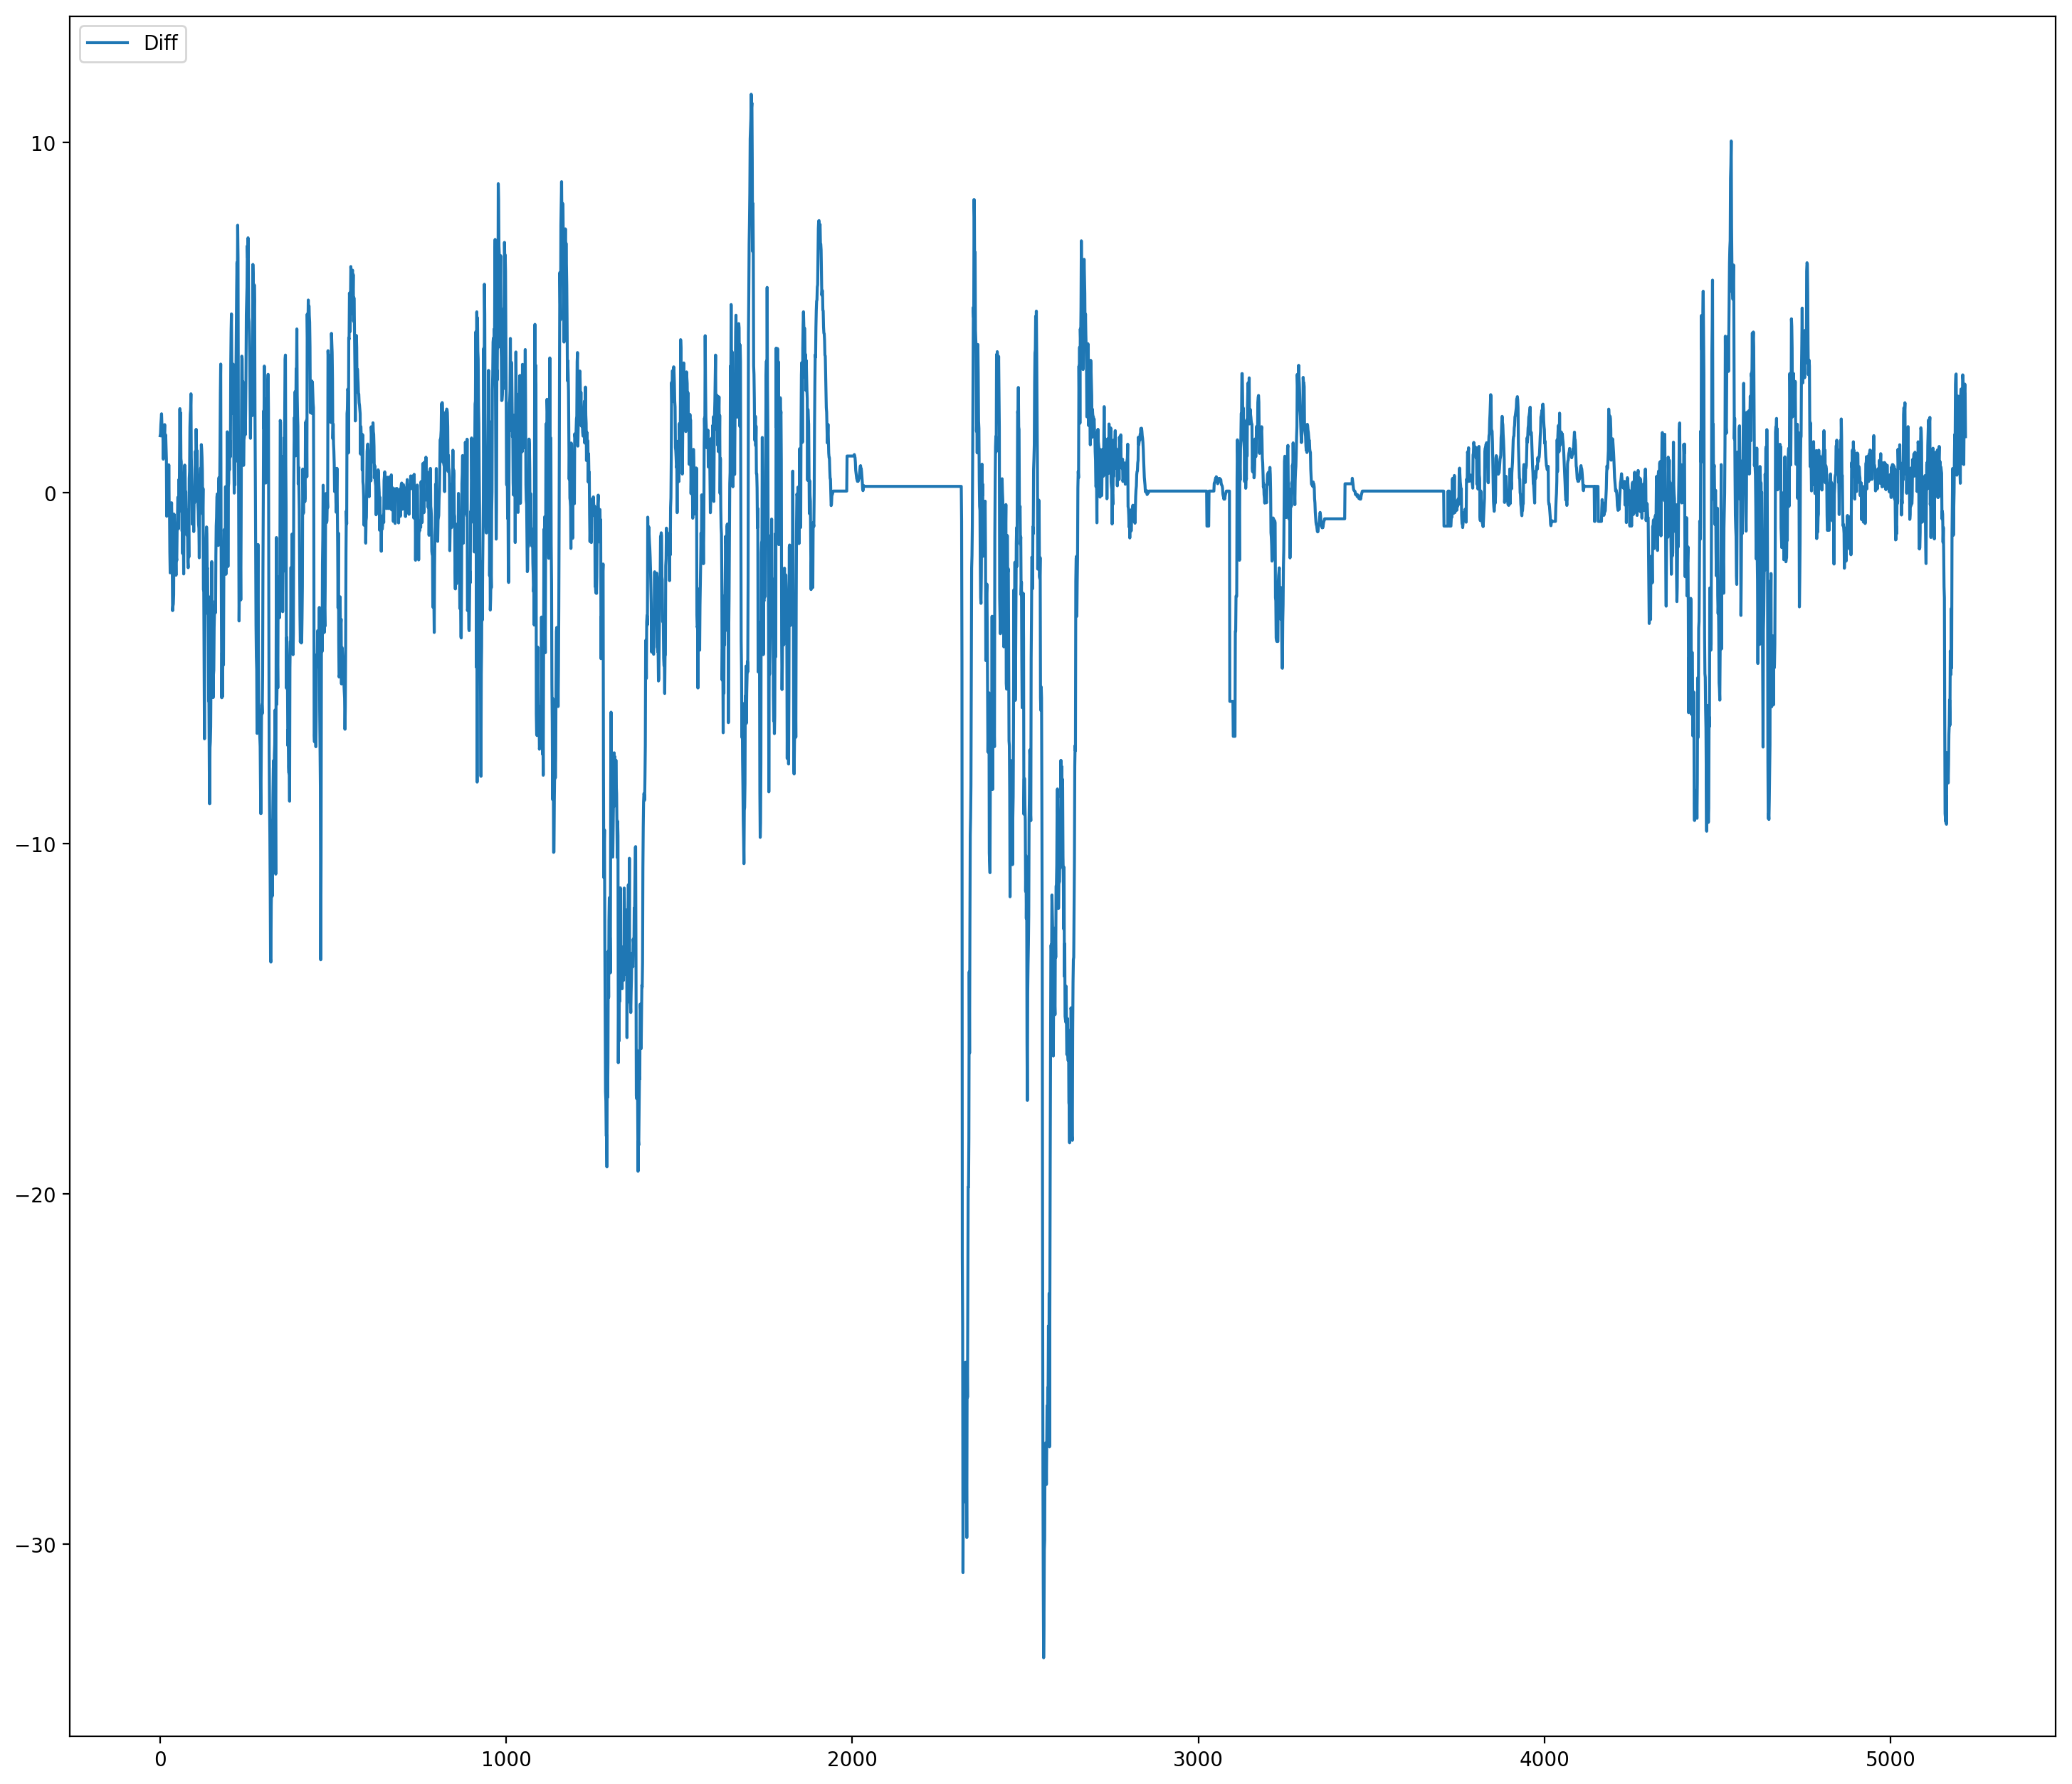

When predicting 20 timesteps forward with a window size of 30:
Results for model 1:
Average error per prediction:
2.469833848669687
Amount of errors:
4999
Probability of an error:
1.0
Results for model 2:
Average error per prediction:
2.797759551910382
Amount of errors:
3381
Probability of an error:
0.6763352670534106


In [47]:
#Suffix 2 in variables: prediction for model 2
test_predictions = model.predict(X_windowed_test_1)
test_predictions_float = [float(x) for x in test_predictions]
#test_predictions_float = [np.argmax(x) for x in test_predictions]#For loss sparse_categorical_crossentropy
#print(test_predictions)
diff = test_predictions_float - Y_windowed_test

test_predictions2 = model2.predict([X_windowed_test, X_total_test])
#test_predictions_float2 = [float(x) for x in test_predictions2]#For regression
test_predictions_int2 = [np.argmax(x) for x in test_predictions2]#For categorization
#print(test_predictions2)
diff2 = test_predictions_int2 - Y_windowed_test

#Plots for analysis - model 1
plt.figure(11, figsize=(18,16), dpi=200)
plt.plot(test_predictions_float)
plt.plot(Y_windowed_test)
plt.legend(['Prediction', 'Real'], loc='upper left')
plt.savefig('prediction_plot.svg', dpi=1000)
plt.show()

plt.figure(12, figsize=(18,16), dpi=200)
plt.plot(diff)
plt.legend(['Diff'], loc='upper left')
plt.savefig('diff_plot.svg', dpi=2000)
plt.show()

#Plots for analysis - model 2

plt.figure(21, figsize=(18,16), dpi=200)
plt.plot(test_predictions_int2)
plt.plot(Y_windowed_test)
plt.legend(['Prediction', 'Real'], loc='upper left')
plt.savefig('prediction_plot2.svg', dpi=1000)
plt.show()

plt.figure(22, figsize=(18,16), dpi=200)
plt.plot(diff)
plt.legend(['Diff'], loc='upper left')
plt.savefig('diff_plot2.svg', dpi=2000)
plt.show()


ind1 = 1
ind2 = 5000

print("When predicting " + str(in_advance) + " timesteps forward with a window size of " +str(window_size) +":")

#Model 1 statistics
sum_errors = 0
num_errors = 0
for i in range(ind1, ind2):
    error = abs(float(test_predictions[i]) - Y_windowed_test[i])
    if error > 0:#If there is an error
        num_errors += 1
    sum_errors += error
print("Results for model 1:")
print("Average error per prediction:")
print(sum_errors/(ind2-ind1))
print("Amount of errors:")
print(num_errors)
print("Probability of an error:")
print(float(num_errors)/float((ind2-ind1)))

#Model 2 statistics

sum_errors2 = 0
num_errors2 = 0
for i in range(ind1, ind2):
    error = abs(float(test_predictions_int2[i]) - Y_windowed_test[i])
    if error > 0:#If there is an error
        num_errors2 += 1
    sum_errors2 += error
print("Results for model 2:")
print("Average error per prediction:")
print(sum_errors2/(ind2-ind1))
print("Amount of errors:")
print(num_errors2)
print("Probability of an error:")
print(float(num_errors2)/float((ind2-ind1)))


Clearly need more training data if results still should improve.

As the in_advance parameter is increased (prediction farther into the future), performance degrades

Increasing window size improves predictions.

Does not handle peaks well!

To get a better model, try different parameters, layers, architectures, window sizes...